In [2]:
%cd ../../../

/home/schilcherj/master/deepClustering/LMU_Master_Practical_SoSe24


/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%load_ext autoreload
%autoreload 2
from practical.DeepClustering.DipECT.dipect import Cluster_Tree, DipECT
from clustpy.deep._data_utils import get_dataloader
from clustpy.data.real_torchvision_data import load_mnist
from clustpy.deep.dipencoder import _Dip_Gradient, dip_test
from clustpy.deep.autoencoders import FeedforwardAutoencoder
import numpy as np
from sklearn.cluster import KMeans
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from clustpy.metrics import unsupervised_clustering_accuracy
import random
import umap
from sklearn.decomposition import PCA
from practical.DeepClustering.DeepECT.evaluation_pipeline import get_custom_dataloader_augmentations, DatasetType

/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dataset, labels = load_mnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/MNIST_pretrained_autoencoder.pth"))
autoencoder.fitted = True

In [7]:
custom_dataloaders = get_custom_dataloader_augmentations(dataset/255, DatasetType.MNIST)

In [9]:
dipect_test = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=1, max_epochs=12, unimodal_treshhold=1.0, augmentation_invariance=True, custom_dataloaders=custom_dataloaders)
dipect_test = dipect_test.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  38802
#assignments:  31198
#assignments best node:  38802


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20509
#assignments:  19055
#assignments:  30436
#assignments best node:  30436


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20553
#assignments:  19281
#assignments:  9240
#assignments:  20926
#assignments best node:  20553


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12566
#assignments:  7770
#assignments:  19038
#assignments:  9536
#assignments:  21090
#assignments best node:  19038


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  11738
#assignments:  8463
#assignments:  10924
#assignments:  8154
#assignments:  10033
#assignments:  20688
#assignments best node:  10924


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12261
#assignments:  8444
#assignments:  6940
#assignments:  4140
#assignments:  8089
#assignments:  9608
#assignments:  20518
#assignments best node:  20518


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  11781
#assignments:  8818
#assignments:  6962
#assignments:  4343
#assignments:  8139
#assignments:  9492
#assignments:  9842
#assignments:  10623
#assignments best node:  11781


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5851
#assignments:  6400
#assignments:  8683
#assignments:  6954
#assignments:  4426
#assignments:  7727
#assignments:  9522
#assignments:  10026
#assignments:  10411
#assignments best node:  10411


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5927
#assignments:  6116
#assignments:  8595
#assignments:  7029
#assignments:  4449
#assignments:  7855
#assignments:  9594
#assignments:  10100
#assignments:  5999
#assignments:  4336
#assignments best node:  9594


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5724
#assignments:  6433
#assignments:  8732
#assignments:  7037
#assignments:  4456
#assignments:  7667
#assignments:  4790
#assignments:  4704
#assignments:  10195
#assignments:  7281
#assignments:  2981
#assignments best node:  10195


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5883
#assignments:  6318
#assignments:  8863
#assignments:  6874
#assignments:  4337
#assignments:  7829
#assignments:  4760
#assignments:  4828
#assignments:  6537
#assignments:  3519
#assignments:  4228
#assignments:  6024
#assignments best node:  7829


Predict: 100%|██████████| 274/274 [00:05<00:00, 46.92it/s]


In [10]:
print(dipect_test.tree_.flat_accuracy(labels, 10))
print(dipect_test.tree_.flat_nmi(labels, 10))

0.8027714285714286
0.734963657327708


In [13]:
dipect_test_2 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=1, max_epochs=12, unimodal_treshhold=1.0, augmentation_invariance=True, custom_dataloaders=custom_dataloaders, unimodal_loss_increase_method="exponential")
dipect_test_2 = dipect_test_2.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  39218
#assignments:  30782
#assignments best node:  39218


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18631
#assignments:  20784
#assignments:  30585
#assignments best node:  30585


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18879
#assignments:  20936
#assignments:  21836
#assignments:  8349
#assignments best node:  18879


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12115
#assignments:  6975
#assignments:  20384
#assignments:  21748
#assignments:  8778


Epoch 4/12:   0%|          | 0/274 [00:07<?, ?batch/s]

#assignments best node:  12115


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5291
#assignments:  6669
#assignments:  7126
#assignments:  20688
#assignments:  21191
#assignments:  9035


Epoch 5/12:   0%|          | 0/274 [00:08<?, ?batch/s]

#assignments best node:  20688


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5339
#assignments:  6545
#assignments:  7230
#assignments:  12343
#assignments:  8204
#assignments:  21147
#assignments:  9192


Epoch 6/12:   0%|          | 0/274 [00:11<?, ?batch/s]

#assignments best node:  21147


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5522
#assignments:  6504
#assignments:  7169
#assignments:  12378
#assignments:  8425
#assignments:  7336
#assignments:  13462
#assignments:  9204


Epoch 7/12:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  12378


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5530
#assignments:  6661
#assignments:  7221
#assignments:  5126
#assignments:  7098
#assignments:  8316
#assignments:  7345
#assignments:  13510
#assignments:  9193


Epoch 8/12:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  13510


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5315
#assignments:  6588
#assignments:  7224
#assignments:  5634
#assignments:  6569
#assignments:  8657
#assignments:  6721
#assignments:  7058
#assignments:  7037
#assignments:  9197


Epoch 9/12:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  9197


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5384
#assignments:  6572
#assignments:  7169
#assignments:  5652
#assignments:  6647
#assignments:  8427
#assignments:  6616
#assignments:  6611
#assignments:  7531
#assignments:  5069
#assignments:  4322


Epoch 10/12:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  8427


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5486
#assignments:  6617
#assignments:  7129
#assignments:  5677
#assignments:  6406
#assignments:  3074
#assignments:  5453
#assignments:  6649
#assignments:  6784
#assignments:  7247
#assignments:  4800
#assignments:  4678
#assignments best node:  4678


Predict: 100%|██████████| 274/274 [00:03<00:00, 84.61it/s]


In [15]:
print(dipect_test_2.tree_.flat_accuracy(labels, 10))
print(dipect_test_2.tree_.flat_nmi(labels, 10))

0.8038714285714286
0.7524601908248149


In [14]:
dipect_test_3 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, augmentation_invariance=True, custom_dataloaders=custom_dataloaders, unimodal_loss_increase_method="linear")
dipect_test_3 = dipect_test_3.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  39581
#assignments:  30419


Epoch 2/45:   0%|          | 0/274 [00:05<?, ?batch/s]

#assignments best node:  39581


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18502
#assignments:  21631
#assignments:  29867


Epoch 4/45:   0%|          | 0/274 [00:05<?, ?batch/s]

#assignments best node:  29867


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18497
#assignments:  21955
#assignments:  21003
#assignments:  8545
#assignments best node:  18497


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7521
#assignments:  11028
#assignments:  22086
#assignments:  20585
#assignments:  8780


Epoch 8/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  11028


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7478
#assignments:  5028
#assignments:  6539
#assignments:  21586
#assignments:  20512
#assignments:  8857
#assignments best node:  21586


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7446
#assignments:  5081
#assignments:  6469
#assignments:  8739
#assignments:  12967
#assignments:  20355
#assignments:  8943


Epoch 12/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  20355


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7457
#assignments:  4855
#assignments:  6452
#assignments:  9275
#assignments:  12553
#assignments:  14051
#assignments:  6286
#assignments:  9071


Epoch 14/45:   0%|          | 0/274 [00:11<?, ?batch/s]

#assignments best node:  12553


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7401
#assignments:  4848
#assignments:  6554
#assignments:  9455
#assignments:  6523
#assignments:  5931
#assignments:  13909
#assignments:  6308
#assignments:  9071
#assignments best node:  13909


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7500
#assignments:  4706
#assignments:  6576
#assignments:  9274
#assignments:  6558
#assignments:  6201
#assignments:  7365
#assignments:  6184
#assignments:  6130
#assignments:  9506


Epoch 18/45:   0%|          | 0/274 [00:13<?, ?batch/s]

#assignments best node:  9274


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7456
#assignments:  4890
#assignments:  6608
#assignments:  6970
#assignments:  2199
#assignments:  6523
#assignments:  6104
#assignments:  7878
#assignments:  5938
#assignments:  5996
#assignments:  9438


Epoch 20/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  9438


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7437
#assignments:  4799
#assignments:  6501
#assignments:  7201
#assignments:  2040
#assignments:  6736
#assignments:  5932
#assignments:  7672
#assignments:  5934
#assignments:  5904
#assignments:  4716
#assignments:  5128
#assignments best node:  5904


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7346
#assignments:  4944
#assignments:  6520
#assignments:  7108
#assignments:  2084
#assignments:  6613
#assignments:  6034
#assignments:  7377
#assignments:  6102
#assignments:  1659
#assignments:  4133
#assignments:  5011
#assignments:  5069


Epoch 24/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  7346


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3779
#assignments:  3551
#assignments:  4856
#assignments:  6550
#assignments:  6848
#assignments:  2507
#assignments:  6639
#assignments:  5976
#assignments:  7092
#assignments:  6404
#assignments:  1867
#assignments:  3738
#assignments:  5165
#assignments:  5028
#assignments best node:  7092


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3863
#assignments:  3529
#assignments:  4846
#assignments:  6592
#assignments:  6425
#assignments:  2582
#assignments:  6450
#assignments:  6222
#assignments:  4832
#assignments:  2200
#assignments:  6387
#assignments:  1933
#assignments:  3678
#assignments:  5143
#assignments:  5318


Epoch 28/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  5143


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3609
#assignments:  3804
#assignments:  4811
#assignments:  6487
#assignments:  6411
#assignments:  2552
#assignments:  6577
#assignments:  6329
#assignments:  2945
#assignments:  3969
#assignments:  6209
#assignments:  1953
#assignments:  3515
#assignments:  3249
#assignments:  2310
#assignments:  5270


Epoch 30/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  6487


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3727
#assignments:  3689
#assignments:  4950
#assignments:  3307
#assignments:  3304
#assignments:  6497
#assignments:  2619
#assignments:  6559
#assignments:  6081
#assignments:  3388
#assignments:  3466
#assignments:  6371
#assignments:  1994
#assignments:  3364
#assignments:  3135
#assignments:  2371
#assignments:  5178


Epoch 32/45:   0%|          | 0/274 [00:21<?, ?batch/s]

#assignments best node:  6371


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3692
#assignments:  3805
#assignments:  4734
#assignments:  3238
#assignments:  3386
#assignments:  6456
#assignments:  2826
#assignments:  6607
#assignments:  5880
#assignments:  3156
#assignments:  3691
#assignments:  3405
#assignments:  2834
#assignments:  1980
#assignments:  3316
#assignments:  3061
#assignments:  2473
#assignments:  5460


Epoch 34/45:   0%|          | 0/274 [00:27<?, ?batch/s]

#assignments best node:  6456


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3512
#assignments:  4017
#assignments:  4841
#assignments:  3040
#assignments:  3561
#assignments:  3748
#assignments:  2661
#assignments:  2812
#assignments:  6537
#assignments:  5981
#assignments:  2860
#assignments:  3567
#assignments:  3868
#assignments:  2368
#assignments:  1966
#assignments:  3078
#assignments:  3102
#assignments:  2960
#assignments:  5521


Epoch 36/45:   0%|          | 0/274 [00:19<?, ?batch/s]

#assignments best node:  6537


Predict: 100%|██████████| 274/274 [00:04<00:00, 63.02it/s]


In [24]:
print(dipect_test_3.tree_.flat_accuracy(labels, 10))
print(dipect_test_3.tree_.flat_nmi(labels, 10))

0.7711
0.7245271322760184


In [11]:
dipect_test_1 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=1, max_epochs=12, unimodal_treshhold=1.0)
dipect_test_1 = dipect_test_1.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  32488
#assignments:  37512


Epoch 1/12:   0%|          | 0/274 [00:07<?, ?batch/s]

#assignments best node:  37512


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  31525
#assignments:  19708
#assignments:  18767


Epoch 2/12:   0%|          | 0/274 [00:06<?, ?batch/s]

#assignments best node:  31525


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21346
#assignments:  9291
#assignments:  19380
#assignments:  19983


Epoch 3/12:   0%|          | 0/274 [00:08<?, ?batch/s]

#assignments best node:  19380


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21350
#assignments:  9108
#assignments:  13946
#assignments:  5313
#assignments:  20283


Epoch 4/12:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  13946


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21188
#assignments:  8925
#assignments:  6770
#assignments:  7146
#assignments:  5563
#assignments:  20408


Epoch 5/12:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  20408


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21200
#assignments:  8836
#assignments:  6799
#assignments:  7105
#assignments:  5499
#assignments:  12690
#assignments:  7871


Epoch 6/12:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  12690


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21162
#assignments:  8784
#assignments:  6755
#assignments:  7091
#assignments:  5514
#assignments:  5484
#assignments:  7113
#assignments:  8097


Epoch 7/12:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  21162


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12512
#assignments:  8702
#assignments:  8704
#assignments:  6755
#assignments:  7017
#assignments:  5490
#assignments:  5569
#assignments:  7122
#assignments:  8129


Epoch 8/12:   0%|          | 0/274 [00:13<?, ?batch/s]

#assignments best node:  8129


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12929
#assignments:  8187
#assignments:  8713
#assignments:  6745
#assignments:  7051
#assignments:  5491
#assignments:  5590
#assignments:  7131
#assignments:  1702
#assignments:  6461


Epoch 9/12:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  12929


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  6244
#assignments:  7008
#assignments:  7740
#assignments:  8646
#assignments:  6765
#assignments:  7042
#assignments:  5401
#assignments:  5737
#assignments:  7121
#assignments:  1703
#assignments:  6593


Epoch 10/12:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  7008


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  6462
#assignments:  3526
#assignments:  3499
#assignments:  7491
#assignments:  8652
#assignments:  6780
#assignments:  7046
#assignments:  5480
#assignments:  5738
#assignments:  7073
#assignments:  1683
#assignments:  6570


Epoch 11/12:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  8652


Predict: 100%|██████████| 274/274 [00:05<00:00, 46.24it/s]


In [12]:
print(dipect_test_1.tree_.flat_accuracy(labels, 10))
print(dipect_test_1.tree_.flat_nmi(labels, 10))

0.8221714285714286
0.8257070449832975


In [25]:
dipect_test_s1 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, random_state=np.random.RandomState(10))
dipect_test_s1 = dipect_test_s1.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  38295
#assignments:  31705


Epoch 2/45:   0%|          | 1/274 [00:05<23:02,  5.07s/batch]

#assignments best node:  38295


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  19958
#assignments:  19419
#assignments:  30623


Epoch 4/45:   0%|          | 1/274 [00:04<22:30,  4.95s/batch]

#assignments best node:  30623


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20427
#assignments:  19287
#assignments:  9063
#assignments:  21223


Epoch 6/45:   0%|          | 1/274 [00:06<30:22,  6.68s/batch]

#assignments best node:  19287


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20789
#assignments:  5254
#assignments:  13952
#assignments:  8946
#assignments:  21059


Epoch 8/45:   0%|          | 0/274 [00:05<?, ?batch/s]

#assignments best node:  13952


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20861
#assignments:  5385
#assignments:  6768
#assignments:  7093
#assignments:  8792
#assignments:  21101


Epoch 10/45:   0%|          | 1/274 [00:08<39:00,  8.57s/batch]

#assignments best node:  20861


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  8189
#assignments:  12773
#assignments:  5479
#assignments:  6776
#assignments:  7015
#assignments:  8673
#assignments:  21095


Epoch 12/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  12773


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  8277
#assignments:  5741
#assignments:  7126
#assignments:  5414
#assignments:  6789
#assignments:  7036
#assignments:  8680
#assignments:  20937


Epoch 14/45:   0%|          | 1/274 [00:09<42:53,  9.43s/batch]

#assignments best node:  20937


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  8331
#assignments:  5771
#assignments:  7096
#assignments:  5374
#assignments:  6785
#assignments:  6992
#assignments:  8573
#assignments:  7127
#assignments:  13951


Epoch 16/45:   0%|          | 1/274 [00:10<48:10, 10.59s/batch]

#assignments best node:  8331


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1715
#assignments:  6667
#assignments:  5779
#assignments:  7012
#assignments:  5467
#assignments:  6775
#assignments:  6994
#assignments:  8617
#assignments:  7111
#assignments:  13863


Epoch 18/45:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  13863


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1721
#assignments:  6691
#assignments:  5853
#assignments:  6994
#assignments:  5433
#assignments:  6811
#assignments:  7012
#assignments:  8530
#assignments:  7251
#assignments:  6894
#assignments:  6810


Epoch 20/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  6894


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1652
#assignments:  6725
#assignments:  5801
#assignments:  7027
#assignments:  5523
#assignments:  6740
#assignments:  7010
#assignments:  8589
#assignments:  7276
#assignments:  3341
#assignments:  3559
#assignments:  6757


Epoch 22/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  8589


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1704
#assignments:  6711
#assignments:  5868
#assignments:  6955
#assignments:  5473
#assignments:  6801
#assignments:  6997
#assignments:  4215
#assignments:  4291
#assignments:  7391
#assignments:  3231
#assignments:  3535
#assignments:  6828


Epoch 24/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  6828


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1724
#assignments:  6796
#assignments:  5846
#assignments:  6973
#assignments:  5465
#assignments:  6766
#assignments:  6965
#assignments:  4183
#assignments:  4370
#assignments:  7394
#assignments:  3374
#assignments:  3378
#assignments:  3055
#assignments:  3711


Epoch 26/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  7394


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1756
#assignments:  6724
#assignments:  5872
#assignments:  6988
#assignments:  5433
#assignments:  6747
#assignments:  7013
#assignments:  4231
#assignments:  4323
#assignments:  5313
#assignments:  2100
#assignments:  3394
#assignments:  3448
#assignments:  3130
#assignments:  3528


Epoch 28/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  6747


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1764
#assignments:  6803
#assignments:  5897
#assignments:  7002
#assignments:  5439
#assignments:  3487
#assignments:  3254
#assignments:  6955
#assignments:  4248
#assignments:  4265
#assignments:  5019
#assignments:  2301
#assignments:  3412
#assignments:  3570
#assignments:  3107
#assignments:  3477


Epoch 30/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  7002


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1702
#assignments:  6775
#assignments:  5867
#assignments:  3197
#assignments:  3760
#assignments:  5421
#assignments:  3439
#assignments:  3301
#assignments:  7008
#assignments:  4280
#assignments:  4222
#assignments:  4920
#assignments:  2529
#assignments:  3572
#assignments:  3539
#assignments:  3045
#assignments:  3423


Epoch 32/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  6775


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1738
#assignments:  3437
#assignments:  3323
#assignments:  5894
#assignments:  3539
#assignments:  3410
#assignments:  5504
#assignments:  3332
#assignments:  3428
#assignments:  6983
#assignments:  4253
#assignments:  4248
#assignments:  4886
#assignments:  2521
#assignments:  3475
#assignments:  3394
#assignments:  3203
#assignments:  3432


Epoch 34/45:   0%|          | 0/274 [00:18<?, ?batch/s]

#assignments best node:  6983


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  1696
#assignments:  4431
#assignments:  2319
#assignments:  5967
#assignments:  3095
#assignments:  3891
#assignments:  5467
#assignments:  3379
#assignments:  3391
#assignments:  3208
#assignments:  3779
#assignments:  4224
#assignments:  4222
#assignments:  4757
#assignments:  2615
#assignments:  3492
#assignments:  3460
#assignments:  3166
#assignments:  3441


Epoch 36/45:   0%|          | 0/274 [00:20<?, ?batch/s]

#assignments best node:  5467


Predict: 100%|██████████| 274/274 [00:04<00:00, 63.58it/s]


In [28]:
print(dipect_test_s1.tree_.flat_accuracy(labels, 10))
print(dipect_test_s1.tree_.flat_nmi(labels, 10))

0.8328714285714286
0.8448954826715714


In [26]:
dipect_test_s2 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, random_state=np.random.RandomState(2))
dipect_test_s2 = dipect_test_s2.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  38751
#assignments:  31249


Epoch 2/45:   0%|          | 1/274 [00:04<21:46,  4.79s/batch]

#assignments best node:  38751


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20177
#assignments:  19240
#assignments:  30583


Epoch 4/45:   0%|          | 1/274 [00:05<24:08,  5.31s/batch]

#assignments best node:  30583


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20759
#assignments:  19169
#assignments:  21258
#assignments:  8814


Epoch 6/45:   0%|          | 1/274 [00:06<28:56,  6.36s/batch]

#assignments best node:  19169


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20901
#assignments:  13952
#assignments:  5256
#assignments:  21183


Epoch 8/45:   0%|          | 0/274 [00:07<?, ?batch/s]

#assignments:  8708
#assignments best node:  13952


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21001
#assignments:  7095
#assignments:  6764
#assignments:  5247
#assignments:  21109
#assignments:  8784


Epoch 10/45:   0%|          | 1/274 [00:08<37:25,  8.23s/batch]

#assignments best node:  21001


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12872
#assignments:  8288
#assignments:  7070
#assignments:  6765
#assignments:  5420
#assignments:  21020
#assignments:  8565


Epoch 12/45:   0%|          | 0/274 [00:08<?, ?batch/s]

#assignments best node:  12872


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5734
#assignments:  7130
#assignments:  8296
#assignments:  7014
#assignments:  6784
#assignments:  5452
#assignments:  21027
#assignments:  8563


Epoch 14/45:   0%|          | 1/274 [00:11<50:12, 11.04s/batch]

#assignments best node:  21027


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5826
#assignments:  7060
#assignments:  8415
#assignments:  7034
#assignments:  6782
#assignments:  5423
#assignments:  13679
#assignments:  7356
#assignments:  8425


Epoch 16/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  8415


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5800
#assignments:  7082
#assignments:  6629
#assignments:  1780
#assignments:  7027
#assignments:  6775
#assignments:  5461
#assignments:  13643
#assignments:  7325
#assignments:  8478


Epoch 18/45:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  13643


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5828
#assignments:  7057
#assignments:  6641
#assignments:  1818
#assignments:  7033
#assignments:  6740
#assignments:  5375
#assignments:  6460
#assignments:  7060
#assignments:  7418
#assignments:  8570


Epoch 20/45:   0%|          | 0/274 [00:11<?, ?batch/s]

#assignments best node:  7060


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5859
#assignments:  7035
#assignments:  6748
#assignments:  1787
#assignments:  7020
#assignments:  6743
#assignments:  5393
#assignments:  6672
#assignments:  3777
#assignments:  3038
#assignments:  7407
#assignments:  8521


Epoch 22/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  6672


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5820
#assignments:  7029
#assignments:  6701
#assignments:  1822
#assignments:  7023
#assignments:  6773
#assignments:  5325
#assignments:  3673
#assignments:  2958
#assignments:  3586
#assignments:  3260
#assignments:  7503
#assignments:  8527


Epoch 24/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  7503


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5828
#assignments:  7017
#assignments:  6678
#assignments:  1818
#assignments:  7014
#assignments:  6764
#assignments:  5376
#assignments:  3516
#assignments:  3061
#assignments:  3607
#assignments:  3319
#assignments:  5253
#assignments:  2195
#assignments:  8554


Epoch 26/45:   0%|          | 0/274 [00:13<?, ?batch/s]

#assignments best node:  8554


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5846
#assignments:  7002
#assignments:  6741
#assignments:  1766
#assignments:  7006
#assignments:  6762
#assignments:  5400
#assignments:  3458
#assignments:  3005
#assignments:  3750
#assignments:  3258
#assignments:  5133
#assignments:  2343
#assignments:  4517
#assignments:  4013


Epoch 28/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  4013


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5832
#assignments:  7003
#assignments:  6667
#assignments:  1788
#assignments:  7013
#assignments:  6757
#assignments:  5379
#assignments:  3363
#assignments:  3032
#assignments:  3684
#assignments:  3280
#assignments:  4976
#assignments:  2619
#assignments:  4279
#assignments:  2119
#assignments:  2209


Epoch 30/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  2209


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5804
#assignments:  6995
#assignments:  6749
#assignments:  1873
#assignments:  7012
#assignments:  6740
#assignments:  5335
#assignments:  3318
#assignments:  2969
#assignments:  3771
#assignments:  3327
#assignments:  4858
#assignments:  2699
#assignments:  4293
#assignments:  3813
#assignments:  340


Epoch 32/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments:  104
#assignments best node:  104


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5830
#assignments:  7023
#assignments:  6741
#assignments:  1815
#assignments:  6992
#assignments:  6717
#assignments:  5367
#assignments:  3350
#assignments:  3024
#assignments:  3692
#assignments:  3321
#assignments:  4858
#assignments:  2695
#assignments:  4327
#assignments:  1843
#assignments:  366
#assignments:  1229


Epoch 34/45:   0%|          | 0/274 [00:18<?, ?batch/s]

#assignments:  810
#assignments best node:  6717


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  5805
#assignments:  7021
#assignments:  6731
#assignments:  1824
#assignments:  6989
#assignments:  3412
#assignments:  3359
#assignments:  5393
#assignments:  3303
#assignments:  3006
#assignments:  3797
#assignments:  3256
#assignments:  4709
#assignments:  2761
#assignments:  4355
#assignments:  2102
#assignments:  379
#assignments:  1068


Epoch 36/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments:  730
#assignments best node:  6989


Predict: 100%|██████████| 274/274 [00:03<00:00, 72.24it/s]


In [29]:
print(dipect_test_s2.tree_.flat_accuracy(labels, 10))
print(dipect_test_s2.tree_.flat_nmi(labels, 10))

0.8302857142857143
0.8407902691700898


In [27]:
dipect_test_s3 = DipECT(autoencoder=autoencoder, use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, random_state=np.random.RandomState(1))
dipect_test_s3 = dipect_test_s3.fit_predict(dataset/255)

cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  31980
#assignments:  38020


Epoch 2/45:   0%|          | 1/274 [00:04<22:01,  4.84s/batch]

#assignments best node:  38020


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  30590
#assignments:  19339
#assignments:  20071


Epoch 4/45:   0%|          | 0/274 [00:06<?, ?batch/s]

#assignments best node:  30590


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21184
#assignments:  9052
#assignments:  19317
#assignments:  20447


Epoch 6/45:   0%|          | 1/274 [00:05<24:38,  5.42s/batch]

#assignments best node:  19317


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21141
#assignments:  8926
#assignments:  5188
#assignments:  13943
#assignments:  20802


Epoch 8/45:   0%|          | 1/274 [00:06<28:08,  6.19s/batch]

#assignments best node:  13943


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21187
#assignments:  8808
#assignments:  5273
#assignments:  6820
#assignments:  7074
#assignments:  20838


Epoch 10/45:   0%|          | 1/274 [00:08<36:39,  8.06s/batch]

#assignments best node:  20838


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21098
#assignments:  8754
#assignments:  5181
#assignments:  6776
#assignments:  7070
#assignments:  12776
#assignments:  8345


Epoch 12/45:   0%|          | 0/274 [00:07<?, ?batch/s]

#assignments best node:  12776


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21101
#assignments:  8669
#assignments:  5331
#assignments:  6800
#assignments:  7046
#assignments:  7097
#assignments:  5643
#assignments:  8313


Epoch 14/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  21101


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  12814
#assignments:  8248
#assignments:  8618
#assignments:  5269
#assignments:  6819
#assignments:  7022
#assignments:  7071
#assignments:  5681
#assignments:  8458


Epoch 16/45:   0%|          | 1/274 [00:09<45:11,  9.93s/batch]

#assignments best node:  8458


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  13440
#assignments:  7535
#assignments:  8680
#assignments:  5281
#assignments:  6778
#assignments:  6999
#assignments:  7086
#assignments:  5695
#assignments:  6667
#assignments:  1839


Epoch 18/45:   0%|          | 0/274 [00:11<?, ?batch/s]

#assignments best node:  13440


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  6482
#assignments:  6977
#assignments:  7585
#assignments:  8562
#assignments:  5260
#assignments:  6789
#assignments:  7015
#assignments:  7045
#assignments:  5739
#assignments:  6667
#assignments:  1879


Epoch 20/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  8562


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  6709
#assignments:  6709
#assignments:  7594
#assignments:  4392
#assignments:  4219
#assignments:  5296
#assignments:  6770
#assignments:  7030
#assignments:  6999
#assignments:  5732
#assignments:  6672
#assignments:  1878


Epoch 22/45:   0%|          | 1/274 [00:13<1:02:57, 13.84s/batch]

#assignments best node:  6709


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3597
#assignments:  3153
#assignments:  6776
#assignments:  7546
#assignments:  4392
#assignments:  4203
#assignments:  5280
#assignments:  6804
#assignments:  7027
#assignments:  7040
#assignments:  5718
#assignments:  6632
#assignments:  1832


Epoch 24/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  6776


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3363
#assignments:  3303
#assignments:  3407
#assignments:  3200
#assignments:  7722
#assignments:  4368
#assignments:  4239
#assignments:  5234
#assignments:  6775
#assignments:  7016
#assignments:  6981
#assignments:  5777
#assignments:  6729
#assignments:  1886


Epoch 26/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  7722


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3573
#assignments:  3256
#assignments:  3438
#assignments:  3274
#assignments:  1999
#assignments:  5517
#assignments:  4314
#assignments:  4229
#assignments:  5187
#assignments:  6768
#assignments:  7027
#assignments:  6990
#assignments:  5758
#assignments:  6771
#assignments:  1899


Epoch 28/45:   0%|          | 0/274 [00:17<?, ?batch/s]

#assignments best node:  4229


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3488
#assignments:  3217
#assignments:  3457
#assignments:  3341
#assignments:  2225
#assignments:  5276
#assignments:  4436
#assignments:  3759
#assignments:  385
#assignments:  5292
#assignments:  6765
#assignments:  6993
#assignments:  7022
#assignments:  5748
#assignments:  6743
#assignments:  1853


Epoch 30/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  385


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3315
#assignments:  3221
#assignments:  3485
#assignments:  3416
#assignments:  2385
#assignments:  5205
#assignments:  4309
#assignments:  3866
#assignments:  122
#assignments:  261
#assignments:  5249
#assignments:  6752
#assignments:  6978
#assignments:  7002
#assignments:  5780
#assignments:  6735
#assignments:  1919


Epoch 32/45:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  122


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3270
#assignments:  3234
#assignments:  3478
#assignments:  3408
#assignments:  2542
#assignments:  5011
#assignments:  4298
#assignments:  3958
#assignments:  122
#assignments:  125
#assignments:  153
#assignments:  5244
#assignments:  6761
#assignments:  6998
#assignments:  6985
#assignments:  5736
#assignments:  6754
#assignments:  1923


Epoch 34/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  125


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3239
#assignments:  3240
#assignments:  3498
#assignments:  3459
#assignments:  2597
#assignments:  4988
#assignments:  4248
#assignments:  1706
#assignments:  746
#assignments:  451
#assignments:  651
#assignments:  845
#assignments:  5205
#assignments:  6770
#assignments:  7002
#assignments:  7010
#assignments:  5723
#assignments:  6702
#assignments:  1920


Epoch 36/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  746


  0%|          | 0/274 [00:00<?, ?batch/s]

Tree size after pruning: 37, leaf nodes: 19
#assignments:  3181
#assignments:  3192
#assignments:  3542
#assignments:  3512
#assignments:  2783
#assignments:  4803
#assignments:  4195
#assignments:  1885
#assignments:  592
#assignments:  299
#assignments:  279
#assignments:  1358
#assignments:  5264
#assignments:  6737
#assignments:  6993
#assignments:  7021
#assignments:  5779
#assignments:  6729
#assignments:  1856


Epoch 40/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  279


Predict: 100%|██████████| 274/274 [00:04<00:00, 60.07it/s]


In [30]:
print(dipect_test_s3.tree_.flat_accuracy(labels, 10))
print(dipect_test_s3.tree_.flat_nmi(labels, 10))

0.8274571428571429
0.8375376020917329


In [32]:
dipect_test_s4 = DipECT(use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, random_state=np.random.RandomState(50), autoencoder_param_path="practical/DeepClustering/DipECT/pretrained_AE_MNIST_seed50.pth")
dipect_test_s4 = dipect_test_s4.fit_predict(dataset/255)

Autoencoder is not fitted yet, will be pretrained.
cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  16741
#assignments:  53259


Epoch 2/45:   0%|          | 1/274 [00:05<26:00,  5.72s/batch]

#assignments best node:  53259


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  42256
#assignments:  12117
#assignments:  15627


Epoch 4/45:   0%|          | 1/274 [00:04<21:27,  4.72s/batch]

#assignments best node:  42256


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21434
#assignments:  19565
#assignments:  13528
#assignments:  15473


Epoch 6/45:   0%|          | 1/274 [00:06<28:03,  6.17s/batch]

#assignments best node:  15473


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  21125
#assignments:  18882
#assignments:  14505
#assignments:  8640
#assignments:  6848


Epoch 8/45:   0%|          | 0/274 [00:06<?, ?batch/s]

#assignments best node:  18882


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20813
#assignments:  10121
#assignments:  8412
#assignments:  15062
#assignments:  8718
#assignments:  6874


Epoch 10/45:   0%|          | 1/274 [00:07<34:35,  7.60s/batch]

#assignments best node:  10121


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  20714
#assignments:  4248
#assignments:  5787
#assignments:  8325
#assignments:  15318
#assignments:  8745
#assignments:  6863


Epoch 12/45:   0%|          | 1/274 [00:07<36:08,  7.95s/batch]

#assignments best node:  20714


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10926
#assignments:  9646
#assignments:  4339
#assignments:  5707
#assignments:  8187
#assignments:  15370
#assignments:  8917
#assignments:  6908


Epoch 14/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  8917


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10656
#assignments:  9953
#assignments:  4044
#assignments:  5772
#assignments:  8132
#assignments:  15773
#assignments:  1758
#assignments:  7013
#assignments:  6899


Epoch 16/45:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  15773


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10493
#assignments:  10042
#assignments:  3895
#assignments:  5698
#assignments:  8001
#assignments:  9978
#assignments:  6147
#assignments:  1816
#assignments:  7038
#assignments:  6892


Epoch 18/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  10042


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10453
#assignments:  3512
#assignments:  6570
#assignments:  3618
#assignments:  5448
#assignments:  7973
#assignments:  10269
#assignments:  6209
#assignments:  2053
#assignments:  7005
#assignments:  6890


Epoch 20/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  10269


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10491
#assignments:  3333
#assignments:  6738
#assignments:  3377
#assignments:  5344
#assignments:  7934
#assignments:  3335
#assignments:  7146
#assignments:  6290
#assignments:  2127
#assignments:  7012
#assignments:  6873


Epoch 22/45:   0%|          | 1/274 [00:16<1:12:57, 16.04s/batch]

#assignments best node:  7934


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  10600
#assignments:  3261
#assignments:  6612
#assignments:  3211
#assignments:  5503
#assignments:  4140
#assignments:  3728
#assignments:  3638
#assignments:  6940
#assignments:  6329
#assignments:  2131
#assignments:  7027
#assignments:  6880


Epoch 24/45:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  10600


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  6858
#assignments:  3453
#assignments:  3468
#assignments:  6706
#assignments:  3091
#assignments:  5364
#assignments:  4127
#assignments:  3737
#assignments:  3814
#assignments:  7021
#assignments:  6366
#assignments:  2156
#assignments:  6982
#assignments:  6857


Epoch 26/45:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  5364


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  7108
#assignments:  3292
#assignments:  3475
#assignments:  6578
#assignments:  2792
#assignments:  2998
#assignments:  2302
#assignments:  4045
#assignments:  3776
#assignments:  4082
#assignments:  7069
#assignments:  6363
#assignments:  2291
#assignments:  6983
#assignments:  6846


Epoch 28/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  7108


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3240
#assignments:  3665
#assignments:  3577
#assignments:  3380
#assignments:  6670
#assignments:  2515
#assignments:  2743
#assignments:  2312
#assignments:  4080
#assignments:  3706
#assignments:  4449
#assignments:  7063
#assignments:  6369
#assignments:  2420
#assignments:  6956
#assignments:  6855


Epoch 30/45:   0%|          | 0/274 [00:23<?, ?batch/s]

#assignments best node:  7063


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3598
#assignments:  2998
#assignments:  3679
#assignments:  3474
#assignments:  6546
#assignments:  2704
#assignments:  2453
#assignments:  2716
#assignments:  4160
#assignments:  3665
#assignments:  4258
#assignments:  3526
#assignments:  3453
#assignments:  6404
#assignments:  2532
#assignments:  6999
#assignments:  6835


Epoch 32/45:   0%|          | 0/274 [00:19<?, ?batch/s]

#assignments best node:  6546


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3535
#assignments:  2999
#assignments:  3709
#assignments:  3544
#assignments:  4037
#assignments:  2629
#assignments:  2855
#assignments:  2470
#assignments:  2559
#assignments:  4174
#assignments:  3664
#assignments:  4131
#assignments:  2874
#assignments:  4064
#assignments:  6416
#assignments:  2505
#assignments:  6991
#assignments:  6844


Epoch 34/45:   0%|          | 0/274 [00:21<?, ?batch/s]

#assignments best node:  6844


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  3308
#assignments:  3068
#assignments:  3947
#assignments:  3459
#assignments:  4040
#assignments:  2595
#assignments:  2660
#assignments:  2520
#assignments:  2446
#assignments:  4069
#assignments:  3769
#assignments:  4371
#assignments:  2772
#assignments:  4123
#assignments:  6418
#assignments:  2608
#assignments:  6966
#assignments:  3361
#assignments:  3500


Epoch 36/45:   0%|          | 0/274 [00:22<?, ?batch/s]

#assignments best node:  6966


Predict: 100%|██████████| 274/274 [00:03<00:00, 72.84it/s]


In [33]:
print(dipect_test_s4.tree_.flat_accuracy(labels, 10))
print(dipect_test_s4.tree_.flat_nmi(labels, 10))

0.7640571428571429
0.7945723351730367


In [36]:
build_and_visualize_tree(dipect_test_s4.tree_.root, dipect_test_s4.autoencoder, dataset/255)

: 

In [6]:
import networkx as nx
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from clustpy.deep._utils import encode_batchwise
from clustpy.deep._data_utils import get_dataloader

def graphviz_layout_binary_tree(G, root):
    A = nx.nx_agraph.to_agraph(G)
    A.layout(prog='dot')  # 'dot' is used for hierarchical layouts
    pos = {}
    for node in G.nodes():
        x, y = A.get_node(node).attr['pos'].split(',')
        pos[node] = (float(x), float(y))
    return pos

def build_and_visualize_tree(root, autoencoder, data):
    if root is None:
        return
    testloader = get_dataloader(data, 256, False, False)
    embedded_data = encode_batchwise(testloader, autoencoder, "cpu")
    embedded_data = torch.from_numpy(embedded_data)

    # Create a directed graph
    G = nx.DiGraph()
    
    # Helper function to add nodes and edges to the graph
    def add_edges(G, node):
        if node.left_child:
            G.add_edge(node, node.left_child)
            add_edges(G, node.left_child)
        if node.right_child:
            G.add_edge(node, node.right_child)
            add_edges(G, node.right_child)
    
    # Add nodes and edges starting from the root
    add_edges(G, root)

    # Create a position dictionary for the nodes
    pos = graphviz_layout_binary_tree(G, root)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 15))
    nx.draw(G, pos, ax=ax, with_labels=False)
    
    # Draw the images at the nodes
    for node in G.nodes:
        image = np.mean(autoencoder.decode(embedded_data[node.assigned_indices]).detach().numpy(), axis=0)
        if np.max(image) <= 1:
            image = image*255
        # image = autoencoder.decode(center).detach().numpy()
        image = image.reshape(28,28)
        
        # if dataset_type == DatasetType.USPS:
        #     image = image.reshape(16,16)
        # else:
        #     image = image.reshape(28,28)
        imagebox = OffsetImage(image, zoom=1)
        ab = AnnotationBbox(imagebox, pos[node], frameon=False)
        ax.add_artist(ab)
    
    plt.show()

from PIL import Image, ImageDraw, ImageFont

def integer_to_image(number, font_size=10, image_size=(28, 28), bg_color=(255, 255, 255), text_color=(0, 0, 0)):
    image = Image.new('RGB', image_size, bg_color)
    
    
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    text = str(number)
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
  
    position = ((image_size[0] - text_width) / 2, (image_size[1] - text_height) / 2)
    

    draw.text(position, text, fill=text_color, font=font)
    
    return np.array(image)


def build_and_visualize_splitindex_tree(root):
    if root is None:
        return

    # Create a directed graph
    G = nx.DiGraph()
    
    # Helper function to add nodes and edges to the graph
    def add_edges(G, node):
        if node.left_child:
            G.add_edge(node, node.left_child)
            add_edges(G, node.left_child)
        if node.right_child:
            G.add_edge(node, node.right_child)
            add_edges(G, node.right_child)
    
    # Add nodes and edges starting from the root
    add_edges(G, root)

    # Create a position dictionary for the nodes
    pos = graphviz_layout_binary_tree(G, root)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 15))
    nx.draw(G, pos, ax=ax, with_labels=False)
    
    # Draw the images at the nodes
    for node in G.nodes:
        image = integer_to_image(node.split_id)
        # image = autoencoder.decode(center).detach().numpy()
        # image = image.reshape(28,28)
        
        # if dataset_type == DatasetType.USPS:
        #     image = image.reshape(16,16)
        # else:
        #     image = image.reshape(28,28)
        imagebox = OffsetImage(image, zoom=1)
        ab = AnnotationBbox(imagebox, pos[node], frameon=False)
        ax.add_artist(ab)
    
    plt.show()
# def visualize_cluster_tree(dataset_type: DatasetType, autoencoder_type: AutoencoderType):
#     dataset = get_dataset(dataset_type)

#     data = dataset["data"]
#     labels = dataset["target"]

#     autoencoder = pretraining(autoencoder_type, None, dataset, 42, 10)

#     deepect = deepect_paper.DeepECT(
#         autoencoder=autoencoder,
#         clustering_optimizer_params={"lr": 1e-4, "betas": (0.9, 0.999)},
#         max_leaf_nodes=20,
#         random_state=np.random.RandomState(42),
#     )

#     deepect.fit_predict(data)

#     print("Accuracy: ", deepect.tree_.flat_accuracy(labels, 10))

#     build_and_visualize_tree(deepect.tree_.root, autoencoder, dataset_type)

In [4]:
dataset, labels = load_mnist(return_X_y=True)
dipect_test_s4 = DipECT(use_pvalue=False, grow_interval=2, max_epochs=45, unimodal_treshhold=1.0, random_state=np.random.RandomState(15), autoencoder_param_path="practical/DeepClustering/DipECT/pretrained_AE_MNIST_seed15.pth")
dipect_test_s4 = dipect_test_s4.fit_predict(dataset/255)

Autoencoder is not fitted yet, will be pretrained.
cpu


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  40317
#assignments:  29683


Epoch 2/45:   0%|          | 1/274 [00:08<39:09,  8.61s/batch]

#assignments best node:  40317


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18817
#assignments:  21780
#assignments:  29403


Epoch 4/45:   0%|          | 0/274 [00:10<?, ?batch/s]

#assignments best node:  29403


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18815
#assignments:  21936
#assignments:  21170
#assignments:  8079


Epoch 6/45:   0%|          | 0/274 [00:09<?, ?batch/s]

#assignments best node:  21936


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18806
#assignments:  9677
#assignments:  12418
#assignments:  21099
#assignments:  8000


Epoch 8/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  12418


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  18801
#assignments:  9621
#assignments:  6252
#assignments:  6185
#assignments:  21152
#assignments:  7989


Epoch 10/45:   0%|          | 0/274 [00:11<?, ?batch/s]

#assignments best node:  18801


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4804
#assignments:  14057
#assignments:  9619
#assignments:  6305
#assignments:  6194
#assignments:  21025
#assignments:  7996


Epoch 12/45:   0%|          | 1/274 [00:13<1:00:52, 13.38s/batch]

#assignments best node:  14057


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4839
#assignments:  7111
#assignments:  6882
#assignments:  9522
#assignments:  6389
#assignments:  6227
#assignments:  21073
#assignments:  7957


Epoch 14/45:   0%|          | 0/274 [00:12<?, ?batch/s]

#assignments best node:  9522


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4821
#assignments:  7089
#assignments:  6893
#assignments:  7352
#assignments:  2306
#assignments:  6333
#assignments:  6203
#assignments:  21039
#assignments:  7964


Epoch 16/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  21039


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4820
#assignments:  7077
#assignments:  6881
#assignments:  7336
#assignments:  2339
#assignments:  6337
#assignments:  6219
#assignments:  10397
#assignments:  10658
#assignments:  7936


Epoch 18/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  10397


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4862
#assignments:  7050
#assignments:  6864
#assignments:  7301
#assignments:  2321
#assignments:  6443
#assignments:  6248
#assignments:  4923
#assignments:  5360
#assignments:  10723
#assignments:  7905


Epoch 20/45:   0%|          | 0/274 [00:15<?, ?batch/s]

#assignments best node:  5360


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4917
#assignments:  7041
#assignments:  6863
#assignments:  7227
#assignments:  2251
#assignments:  6386
#assignments:  6255
#assignments:  5880
#assignments:  2543
#assignments:  1619
#assignments:  11079
#assignments:  7939


Epoch 22/45:   0%|          | 0/274 [00:20<?, ?batch/s]

#assignments best node:  11079


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4842
#assignments:  7037
#assignments:  6869
#assignments:  7216
#assignments:  2342
#assignments:  6505
#assignments:  6263
#assignments:  5645
#assignments:  2505
#assignments:  1850
#assignments:  4375
#assignments:  6645
#assignments:  7906


Epoch 24/45:   0%|          | 0/274 [00:14<?, ?batch/s]

#assignments best node:  7906


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4896
#assignments:  7019
#assignments:  6834
#assignments:  7271
#assignments:  2272
#assignments:  6420
#assignments:  6296
#assignments:  5595
#assignments:  2610
#assignments:  1887
#assignments:  4209
#assignments:  6724
#assignments:  3936
#assignments:  4031


Epoch 26/45:   0%|          | 0/274 [00:16<?, ?batch/s]

#assignments best node:  7271


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4871
#assignments:  6998
#assignments:  6862
#assignments:  4123
#assignments:  3136
#assignments:  2259
#assignments:  6459
#assignments:  6287
#assignments:  5463
#assignments:  2476
#assignments:  2113
#assignments:  4324
#assignments:  6700
#assignments:  3888
#assignments:  4041


Epoch 28/45:   0%|          | 0/274 [00:24<?, ?batch/s]

#assignments best node:  6998


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4896
#assignments:  3452
#assignments:  3577
#assignments:  6862
#assignments:  3745
#assignments:  3480
#assignments:  2320
#assignments:  6371
#assignments:  6266
#assignments:  5532
#assignments:  2239
#assignments:  2048
#assignments:  4561
#assignments:  6689
#assignments:  3863
#assignments:  4099


Epoch 30/45:   0%|          | 0/274 [00:21<?, ?batch/s]

#assignments best node:  6862


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4967
#assignments:  3740
#assignments:  3261
#assignments:  3314
#assignments:  3551
#assignments:  2637
#assignments:  4591
#assignments:  2204
#assignments:  6392
#assignments:  6324
#assignments:  5494
#assignments:  2322
#assignments:  2035
#assignments:  4443
#assignments:  6748
#assignments:  3853
#assignments:  4124


Epoch 32/45:   0%|          | 0/274 [00:24<?, ?batch/s]

#assignments best node:  6748


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4960
#assignments:  3594
#assignments:  3392
#assignments:  3578
#assignments:  3278
#assignments:  3964
#assignments:  3298
#assignments:  2276
#assignments:  6432
#assignments:  6267
#assignments:  5486
#assignments:  2526
#assignments:  1950
#assignments:  4425
#assignments:  3468
#assignments:  3144
#assignments:  3935
#assignments:  4027


Epoch 34/45:   0%|          | 0/274 [00:24<?, ?batch/s]

#assignments best node:  6432


  0%|          | 0/274 [00:00<?, ?batch/s]

#assignments:  4925
#assignments:  3694
#assignments:  3289
#assignments:  3775
#assignments:  3067
#assignments:  2473
#assignments:  4788
#assignments:  2291
#assignments:  3351
#assignments:  3054
#assignments:  6256
#assignments:  5523
#assignments:  2485
#assignments:  1934
#assignments:  4431
#assignments:  3725
#assignments:  2978
#assignments:  3902
#assignments:  4059


Epoch 36/45:   0%|          | 0/274 [00:27<?, ?batch/s]

#assignments best node:  6256


Predict: 100%|██████████| 274/274 [00:05<00:00, 45.71it/s]


In [5]:
print(dipect_test_s4.tree_.flat_accuracy(labels, 10))
print(dipect_test_s4.tree_.flat_nmi(labels, 10))

0.8385857142857143
0.8439194274215269


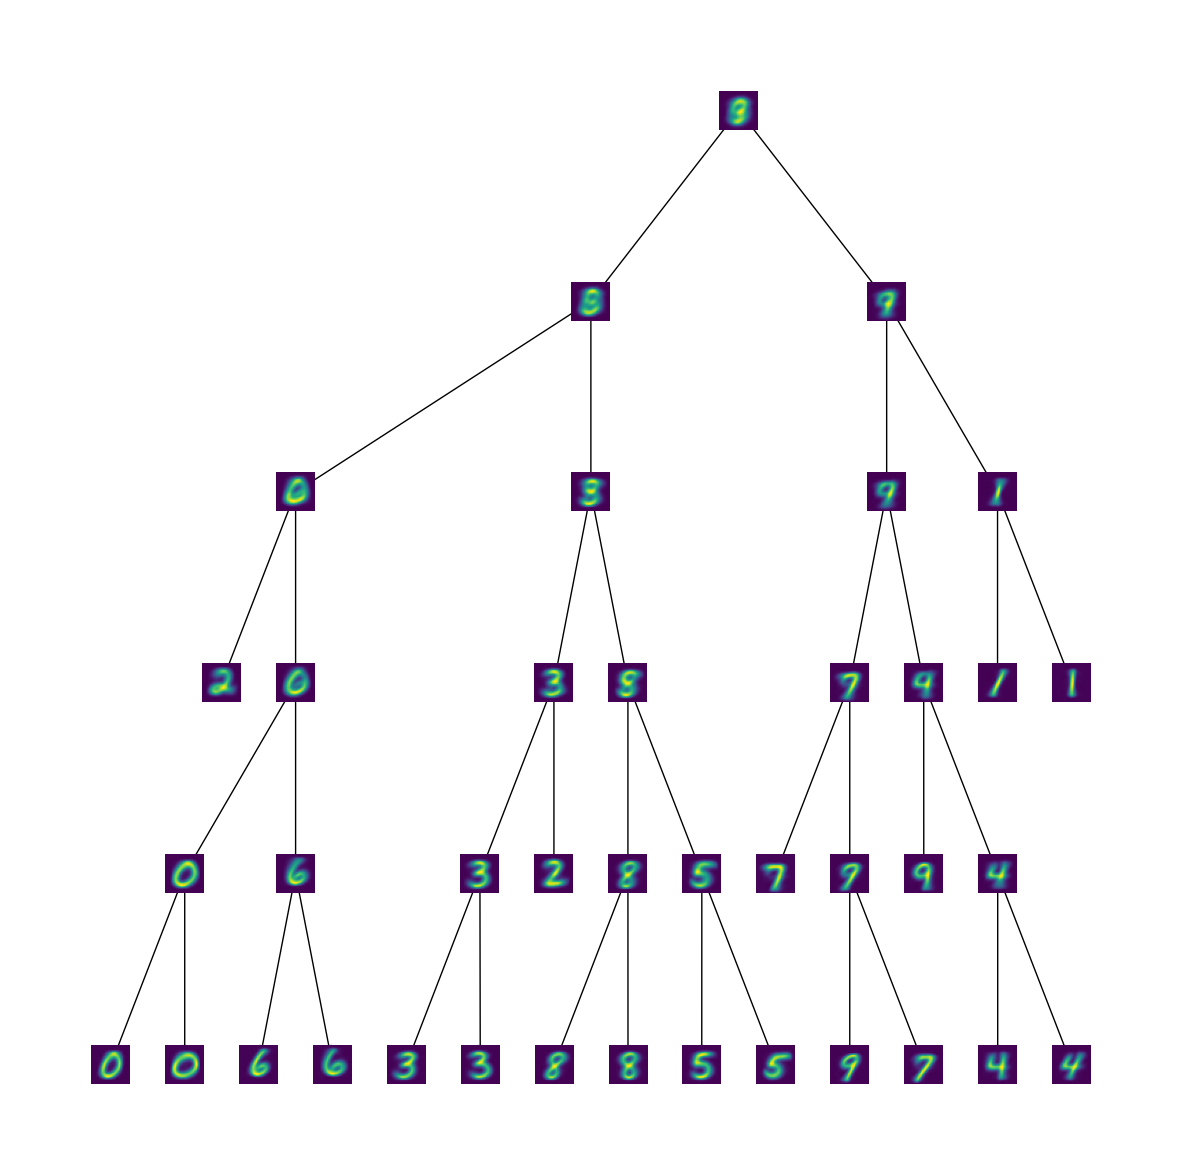

In [7]:
build_and_visualize_tree(dipect_test_s4.tree_.root, dipect_test_s4.autoencoder, dataset/255)